In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Get CSV file
zoo = pd.read_csv(os.path.join('..','Resources', 'zoo.csv'))
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
0,Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
2,Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
3,Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
4,Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
208,Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
209,Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate
210,Wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,Bird


In [3]:
zoo_df=zoo.set_index('animal_name')
zoo_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
animal_name,,,,,,,,,,,,,,,,,,
Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


In [4]:
# Assign X and y
X = zoo_df.drop(["class_type","class"], axis=1)
y_name = zoo_df["class"]
print(X.shape, y_name.shape)

(212, 16) (212,)


### Neural network

In [5]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_name_train, y_name_test = train_test_split(X, y_name, random_state=1)

In [6]:
#Scaling - Standard
from sklearn.preprocessing import StandardScaler

X_scaler_standard = StandardScaler().fit(X_train)
X_train_scaled_standard = X_scaler_standard.transform(X_train)
X_test_scaled_standard = X_scaler_standard.transform(X_test)

In [7]:
#Scaling - MinMax
from sklearn.preprocessing import MinMaxScaler

X_scaler_minmax = MinMaxScaler().fit(X_train)
X_train_scaled_minmax = X_scaler_minmax.transform(X_train)
X_test_scaled_minmax = X_scaler_minmax.transform(X_test)

In [8]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_name)
encoded_y_train = label_encoder.transform(y_name_train)
encoded_y_test= label_encoder.transform(y_name_test)

In [9]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical

y_name_train_categorical = to_categorical(encoded_y_train)
y_name_test_categorical = to_categorical(encoded_y_test)

In [10]:
from tensorflow.keras.models import Sequential

# Unscaled
nn_model_unscaled = Sequential()

# Add first layer
from tensorflow.keras.layers import Dense
nn_model_unscaled.add(Dense(units=10,activation='relu', input_dim=16))

# Add output layer
nn_model_unscaled.add(Dense(units=7, activation='softmax'))

# Compile the model
nn_model_unscaled.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit (train) the model - Unscaled
nn_model_unscaled.fit(
    X_train,
    y_name_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Train on 159 samples
Epoch 1/500
159/159 - 1s - loss: 1.9886 - accuracy: 0.1509
Epoch 2/500
159/159 - 0s - loss: 1.9530 - accuracy: 0.1761
Epoch 3/500
159/159 - 0s - loss: 1.9209 - accuracy: 0.2075
Epoch 4/500
159/159 - 0s - loss: 1.8888 - accuracy: 0.2075
Epoch 5/500
159/159 - 0s - loss: 1.8598 - accuracy: 0.2201
Epoch 6/500
159/159 - 0s - loss: 1.8320 - accuracy: 0.2138
Epoch 7/500
159/159 - 0s - loss: 1.8053 - accuracy: 0.2264
Epoch 8/500
159/159 - 0s - loss: 1.7801 - accuracy: 0.2327
Epoch 9/500
159/159 - 0s - loss: 1.7552 - accuracy: 0.2516
Epoch 10/500
159/159 - 0s - loss: 1.7308 - accuracy: 0.2767
Epoch 11/500
159/159 - 0s - loss: 1.7067 - accuracy: 0.2830
Epoch 12/500
159/159 - 0s - loss: 1.6853 - accuracy: 0.3145
Epoch 13/500
159/159 - 0s - loss: 1.6613 - accuracy: 0.3145
Epoch 14/500
159/159 - 0s - loss: 1.6378 - accuracy: 0.3585
Epoch 15/500
159/159 - 0s - loss: 1.6146 - accuracy: 0.3585
Epoch 16/500
159/159 - 0s - loss: 1.5910 - accuracy: 0.3711
Epoch 17/500
159/159 - 0s - 

Epoch 137/500
159/159 - 0s - loss: 0.3245 - accuracy: 0.9623
Epoch 138/500
159/159 - 0s - loss: 0.3212 - accuracy: 0.9623
Epoch 139/500
159/159 - 0s - loss: 0.3179 - accuracy: 0.9623
Epoch 140/500
159/159 - 0s - loss: 0.3145 - accuracy: 0.9623
Epoch 141/500
159/159 - 0s - loss: 0.3112 - accuracy: 0.9623
Epoch 142/500
159/159 - 0s - loss: 0.3079 - accuracy: 0.9623
Epoch 143/500
159/159 - 0s - loss: 0.3047 - accuracy: 0.9623
Epoch 144/500
159/159 - 0s - loss: 0.3019 - accuracy: 0.9623
Epoch 145/500
159/159 - 0s - loss: 0.2987 - accuracy: 0.9623
Epoch 146/500
159/159 - 0s - loss: 0.2958 - accuracy: 0.9623
Epoch 147/500
159/159 - 0s - loss: 0.2931 - accuracy: 0.9623
Epoch 148/500
159/159 - 0s - loss: 0.2900 - accuracy: 0.9623
Epoch 149/500
159/159 - 0s - loss: 0.2873 - accuracy: 0.9623
Epoch 150/500
159/159 - 0s - loss: 0.2845 - accuracy: 0.9623
Epoch 151/500
159/159 - 0s - loss: 0.2818 - accuracy: 0.9623
Epoch 152/500
159/159 - 0s - loss: 0.2791 - accuracy: 0.9623
Epoch 153/500
159/159 - 

Epoch 272/500
159/159 - 0s - loss: 0.1179 - accuracy: 0.9748
Epoch 273/500
159/159 - 0s - loss: 0.1173 - accuracy: 0.9748
Epoch 274/500
159/159 - 0s - loss: 0.1167 - accuracy: 0.9748
Epoch 275/500
159/159 - 0s - loss: 0.1161 - accuracy: 0.9748
Epoch 276/500
159/159 - 0s - loss: 0.1155 - accuracy: 0.9748
Epoch 277/500
159/159 - 0s - loss: 0.1150 - accuracy: 0.9748
Epoch 278/500
159/159 - 0s - loss: 0.1144 - accuracy: 0.9748
Epoch 279/500
159/159 - 0s - loss: 0.1137 - accuracy: 0.9748
Epoch 280/500
159/159 - 0s - loss: 0.1131 - accuracy: 0.9748
Epoch 281/500
159/159 - 0s - loss: 0.1124 - accuracy: 0.9748
Epoch 282/500
159/159 - 0s - loss: 0.1119 - accuracy: 0.9748
Epoch 283/500
159/159 - 0s - loss: 0.1114 - accuracy: 0.9748
Epoch 284/500
159/159 - 0s - loss: 0.1108 - accuracy: 0.9748
Epoch 285/500
159/159 - 0s - loss: 0.1101 - accuracy: 0.9748
Epoch 286/500
159/159 - 0s - loss: 0.1096 - accuracy: 0.9748
Epoch 287/500
159/159 - 0s - loss: 0.1091 - accuracy: 0.9748
Epoch 288/500
159/159 - 

Epoch 407/500
159/159 - 0s - loss: 0.0633 - accuracy: 0.9811
Epoch 408/500
159/159 - 0s - loss: 0.0629 - accuracy: 0.9811
Epoch 409/500
159/159 - 0s - loss: 0.0630 - accuracy: 0.9811
Epoch 410/500
159/159 - 0s - loss: 0.0626 - accuracy: 0.9811
Epoch 411/500
159/159 - 0s - loss: 0.0625 - accuracy: 0.9811
Epoch 412/500
159/159 - 0s - loss: 0.0623 - accuracy: 0.9811
Epoch 413/500
159/159 - 0s - loss: 0.0619 - accuracy: 0.9811
Epoch 414/500
159/159 - 0s - loss: 0.0618 - accuracy: 0.9811
Epoch 415/500
159/159 - 0s - loss: 0.0617 - accuracy: 0.9811
Epoch 416/500
159/159 - 0s - loss: 0.0613 - accuracy: 0.9811
Epoch 417/500
159/159 - 0s - loss: 0.0611 - accuracy: 0.9811
Epoch 418/500
159/159 - 0s - loss: 0.0611 - accuracy: 0.9811
Epoch 419/500
159/159 - 0s - loss: 0.0607 - accuracy: 0.9811
Epoch 420/500
159/159 - 0s - loss: 0.0606 - accuracy: 0.9811
Epoch 421/500
159/159 - 0s - loss: 0.0603 - accuracy: 0.9811
Epoch 422/500
159/159 - 0s - loss: 0.0601 - accuracy: 0.9811
Epoch 423/500
159/159 - 

In [11]:
# Standard Scaling
nn_model_standard = Sequential()

# Add first layer
from tensorflow.keras.layers import Dense
nn_model_standard.add(Dense(units=10,activation='relu', input_dim=16))

# Add output layer
nn_model_standard.add(Dense(units=7, activation='softmax'))

# Compile the model
nn_model_standard.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit (train) the model - Standard Scaling
nn_model_standard.fit(
    X_train_scaled_standard,
    y_name_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Train on 159 samples
Epoch 1/500
159/159 - 0s - loss: 2.4842 - accuracy: 0.0503
Epoch 2/500
159/159 - 0s - loss: 2.4150 - accuracy: 0.0566
Epoch 3/500
159/159 - 0s - loss: 2.3478 - accuracy: 0.0566
Epoch 4/500
159/159 - 0s - loss: 2.2819 - accuracy: 0.0566
Epoch 5/500
159/159 - 0s - loss: 2.2167 - accuracy: 0.0566
Epoch 6/500
159/159 - 0s - loss: 2.1554 - accuracy: 0.0566
Epoch 7/500
159/159 - 0s - loss: 2.0959 - accuracy: 0.0692
Epoch 8/500
159/159 - 0s - loss: 2.0390 - accuracy: 0.0818
Epoch 9/500
159/159 - 0s - loss: 1.9813 - accuracy: 0.0881
Epoch 10/500
159/159 - 0s - loss: 1.9293 - accuracy: 0.1761
Epoch 11/500
159/159 - 0s - loss: 1.8781 - accuracy: 0.2390
Epoch 12/500
159/159 - 0s - loss: 1.8260 - accuracy: 0.3019
Epoch 13/500
159/159 - 0s - loss: 1.7812 - accuracy: 0.3396
Epoch 14/500
159/159 - 0s - loss: 1.7341 - accuracy: 0.3585
Epoch 15/500
159/159 - 0s - loss: 1.6916 - accuracy: 0.3836
Epoch 16/500
159/159 - 0s - loss: 1.6494 - accuracy: 0.3899
Epoch 17/500
159/159 - 0s - 

Epoch 137/500
159/159 - 0s - loss: 0.2301 - accuracy: 0.9560
Epoch 138/500
159/159 - 0s - loss: 0.2273 - accuracy: 0.9560
Epoch 139/500
159/159 - 0s - loss: 0.2247 - accuracy: 0.9560
Epoch 140/500
159/159 - 0s - loss: 0.2217 - accuracy: 0.9560
Epoch 141/500
159/159 - 0s - loss: 0.2190 - accuracy: 0.9560
Epoch 142/500
159/159 - 0s - loss: 0.2166 - accuracy: 0.9560
Epoch 143/500
159/159 - 0s - loss: 0.2138 - accuracy: 0.9560
Epoch 144/500
159/159 - 0s - loss: 0.2114 - accuracy: 0.9560
Epoch 145/500
159/159 - 0s - loss: 0.2092 - accuracy: 0.9560
Epoch 146/500
159/159 - 0s - loss: 0.2065 - accuracy: 0.9623
Epoch 147/500
159/159 - 0s - loss: 0.2045 - accuracy: 0.9623
Epoch 148/500
159/159 - 0s - loss: 0.2022 - accuracy: 0.9623
Epoch 149/500
159/159 - 0s - loss: 0.2001 - accuracy: 0.9623
Epoch 150/500
159/159 - 0s - loss: 0.1979 - accuracy: 0.9623
Epoch 151/500
159/159 - 0s - loss: 0.1959 - accuracy: 0.9623
Epoch 152/500
159/159 - 0s - loss: 0.1939 - accuracy: 0.9623
Epoch 153/500
159/159 - 

Epoch 272/500
159/159 - 0s - loss: 0.0913 - accuracy: 0.9811
Epoch 273/500
159/159 - 0s - loss: 0.0910 - accuracy: 0.9811
Epoch 274/500
159/159 - 0s - loss: 0.0905 - accuracy: 0.9811
Epoch 275/500
159/159 - 0s - loss: 0.0902 - accuracy: 0.9811
Epoch 276/500
159/159 - 0s - loss: 0.0898 - accuracy: 0.9811
Epoch 277/500
159/159 - 0s - loss: 0.0894 - accuracy: 0.9811
Epoch 278/500
159/159 - 0s - loss: 0.0890 - accuracy: 0.9811
Epoch 279/500
159/159 - 0s - loss: 0.0885 - accuracy: 0.9811
Epoch 280/500
159/159 - 0s - loss: 0.0882 - accuracy: 0.9811
Epoch 281/500
159/159 - 0s - loss: 0.0878 - accuracy: 0.9811
Epoch 282/500
159/159 - 0s - loss: 0.0875 - accuracy: 0.9811
Epoch 283/500
159/159 - 0s - loss: 0.0871 - accuracy: 0.9811
Epoch 284/500
159/159 - 0s - loss: 0.0866 - accuracy: 0.9811
Epoch 285/500
159/159 - 0s - loss: 0.0864 - accuracy: 0.9811
Epoch 286/500
159/159 - 0s - loss: 0.0859 - accuracy: 0.9811
Epoch 287/500
159/159 - 0s - loss: 0.0855 - accuracy: 0.9811
Epoch 288/500
159/159 - 

Epoch 407/500
159/159 - 0s - loss: 0.0552 - accuracy: 0.9811
Epoch 408/500
159/159 - 0s - loss: 0.0550 - accuracy: 0.9811
Epoch 409/500
159/159 - 0s - loss: 0.0549 - accuracy: 0.9811
Epoch 410/500
159/159 - 0s - loss: 0.0546 - accuracy: 0.9811
Epoch 411/500
159/159 - 0s - loss: 0.0545 - accuracy: 0.9811
Epoch 412/500
159/159 - 0s - loss: 0.0543 - accuracy: 0.9811
Epoch 413/500
159/159 - 0s - loss: 0.0542 - accuracy: 0.9811
Epoch 414/500
159/159 - 0s - loss: 0.0540 - accuracy: 0.9811
Epoch 415/500
159/159 - 0s - loss: 0.0538 - accuracy: 0.9811
Epoch 416/500
159/159 - 0s - loss: 0.0536 - accuracy: 0.9811
Epoch 417/500
159/159 - 0s - loss: 0.0535 - accuracy: 0.9811
Epoch 418/500
159/159 - 0s - loss: 0.0534 - accuracy: 0.9811
Epoch 419/500
159/159 - 0s - loss: 0.0533 - accuracy: 0.9811
Epoch 420/500
159/159 - 0s - loss: 0.0532 - accuracy: 0.9811
Epoch 421/500
159/159 - 0s - loss: 0.0530 - accuracy: 0.9811
Epoch 422/500
159/159 - 0s - loss: 0.0528 - accuracy: 0.9811
Epoch 423/500
159/159 - 

In [12]:
# MinMax Scaling
nn_model_minmax = Sequential()

# Add first layer
from tensorflow.keras.layers import Dense
nn_model_minmax.add(Dense(units=10,activation='relu', input_dim=16))

# Add output layer
nn_model_minmax.add(Dense(units=7, activation='softmax'))

# Compile the model
nn_model_minmax.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit (train) the model - MinMax Scaling
nn_model_minmax.fit(
    X_train_scaled_minmax,
    y_name_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Train on 159 samples
Epoch 1/500
159/159 - 1s - loss: 1.8811 - accuracy: 0.2201
Epoch 2/500
159/159 - 0s - loss: 1.8576 - accuracy: 0.2579
Epoch 3/500
159/159 - 0s - loss: 1.8328 - accuracy: 0.2893
Epoch 4/500
159/159 - 0s - loss: 1.8087 - accuracy: 0.3082
Epoch 5/500
159/159 - 0s - loss: 1.7842 - accuracy: 0.3270
Epoch 6/500
159/159 - 0s - loss: 1.7601 - accuracy: 0.3333
Epoch 7/500
159/159 - 0s - loss: 1.7366 - accuracy: 0.3459
Epoch 8/500
159/159 - 0s - loss: 1.7126 - accuracy: 0.3522
Epoch 9/500
159/159 - 0s - loss: 1.6881 - accuracy: 0.3836
Epoch 10/500
159/159 - 0s - loss: 1.6625 - accuracy: 0.4025
Epoch 11/500
159/159 - 0s - loss: 1.6367 - accuracy: 0.4025
Epoch 12/500
159/159 - 0s - loss: 1.6106 - accuracy: 0.4151
Epoch 13/500
159/159 - 0s - loss: 1.5857 - accuracy: 0.4277
Epoch 14/500
159/159 - 0s - loss: 1.5601 - accuracy: 0.4277
Epoch 15/500
159/159 - 0s - loss: 1.5360 - accuracy: 0.4843
Epoch 16/500
159/159 - 0s - loss: 1.5121 - accuracy: 0.4843
Epoch 17/500
159/159 - 0s - 

Epoch 137/500
159/159 - 0s - loss: 0.2598 - accuracy: 0.9623
Epoch 138/500
159/159 - 0s - loss: 0.2567 - accuracy: 0.9623
Epoch 139/500
159/159 - 0s - loss: 0.2536 - accuracy: 0.9623
Epoch 140/500
159/159 - 0s - loss: 0.2505 - accuracy: 0.9623
Epoch 141/500
159/159 - 0s - loss: 0.2477 - accuracy: 0.9623
Epoch 142/500
159/159 - 0s - loss: 0.2449 - accuracy: 0.9623
Epoch 143/500
159/159 - 0s - loss: 0.2421 - accuracy: 0.9623
Epoch 144/500
159/159 - 0s - loss: 0.2393 - accuracy: 0.9623
Epoch 145/500
159/159 - 0s - loss: 0.2368 - accuracy: 0.9623
Epoch 146/500
159/159 - 0s - loss: 0.2340 - accuracy: 0.9623
Epoch 147/500
159/159 - 0s - loss: 0.2315 - accuracy: 0.9623
Epoch 148/500
159/159 - 0s - loss: 0.2290 - accuracy: 0.9623
Epoch 149/500
159/159 - 0s - loss: 0.2262 - accuracy: 0.9623
Epoch 150/500
159/159 - 0s - loss: 0.2239 - accuracy: 0.9623
Epoch 151/500
159/159 - 0s - loss: 0.2213 - accuracy: 0.9623
Epoch 152/500
159/159 - 0s - loss: 0.2189 - accuracy: 0.9623
Epoch 153/500
159/159 - 

Epoch 272/500
159/159 - 0s - loss: 0.0904 - accuracy: 0.9811
Epoch 273/500
159/159 - 0s - loss: 0.0896 - accuracy: 0.9811
Epoch 274/500
159/159 - 0s - loss: 0.0892 - accuracy: 0.9811
Epoch 275/500
159/159 - 0s - loss: 0.0887 - accuracy: 0.9811
Epoch 276/500
159/159 - 0s - loss: 0.0882 - accuracy: 0.9811
Epoch 277/500
159/159 - 0s - loss: 0.0879 - accuracy: 0.9811
Epoch 278/500
159/159 - 0s - loss: 0.0875 - accuracy: 0.9811
Epoch 279/500
159/159 - 0s - loss: 0.0870 - accuracy: 0.9811
Epoch 280/500
159/159 - 0s - loss: 0.0865 - accuracy: 0.9811
Epoch 281/500
159/159 - 0s - loss: 0.0863 - accuracy: 0.9811
Epoch 282/500
159/159 - 0s - loss: 0.0858 - accuracy: 0.9811
Epoch 283/500
159/159 - 0s - loss: 0.0853 - accuracy: 0.9811
Epoch 284/500
159/159 - 0s - loss: 0.0850 - accuracy: 0.9811
Epoch 285/500
159/159 - 0s - loss: 0.0846 - accuracy: 0.9811
Epoch 286/500
159/159 - 0s - loss: 0.0842 - accuracy: 0.9811
Epoch 287/500
159/159 - 0s - loss: 0.0838 - accuracy: 0.9811
Epoch 288/500
159/159 - 

Epoch 407/500
159/159 - 0s - loss: 0.0554 - accuracy: 0.9874
Epoch 408/500
159/159 - 0s - loss: 0.0553 - accuracy: 0.9874
Epoch 409/500
159/159 - 0s - loss: 0.0551 - accuracy: 0.9874
Epoch 410/500
159/159 - 0s - loss: 0.0550 - accuracy: 0.9874
Epoch 411/500
159/159 - 0s - loss: 0.0549 - accuracy: 0.9874
Epoch 412/500
159/159 - 0s - loss: 0.0547 - accuracy: 0.9874
Epoch 413/500
159/159 - 0s - loss: 0.0545 - accuracy: 0.9874
Epoch 414/500
159/159 - 0s - loss: 0.0544 - accuracy: 0.9874
Epoch 415/500
159/159 - 0s - loss: 0.0544 - accuracy: 0.9874
Epoch 416/500
159/159 - 0s - loss: 0.0541 - accuracy: 0.9874
Epoch 417/500
159/159 - 0s - loss: 0.0540 - accuracy: 0.9874
Epoch 418/500
159/159 - 0s - loss: 0.0539 - accuracy: 0.9874
Epoch 419/500
159/159 - 0s - loss: 0.0537 - accuracy: 0.9874
Epoch 420/500
159/159 - 0s - loss: 0.0537 - accuracy: 0.9874
Epoch 421/500
159/159 - 0s - loss: 0.0535 - accuracy: 0.9874
Epoch 422/500
159/159 - 0s - loss: 0.0533 - accuracy: 0.9874
Epoch 423/500
159/159 - 

In [13]:
# Predictions
# Unscaled
predictions_nn_unscaled = nn_model_unscaled.predict_classes(X_test)
predictions_nn_unscaled_labels = label_encoder.inverse_transform(predictions_nn_unscaled)

# Standard Scaling
predictions_nn_standard = nn_model_standard.predict_classes(X_test)
predictions_nn_standard_labels = label_encoder.inverse_transform(predictions_nn_standard)

# MinMax Scaling
predictions_nn_minmax = nn_model_minmax.predict_classes(X_test)
predictions_nn_minmax_labels = label_encoder.inverse_transform(predictions_nn_minmax)

# Create Summary Dataframe
nn_predictions_table = pd.DataFrame({
    "Unscaled_Prediction": predictions_nn_unscaled_labels,
    "Standard_Scaled_Prediction": predictions_nn_standard_labels,
    "MinMax_Scaled_Prediction": predictions_nn_minmax_labels,
    "Actual": y_name_test
})

nn_predictions_table

,Unscaled_Prediction,Standard_Scaled_Prediction,MinMax_Scaled_Prediction,Actual
animal_name,,,,
Crow,Bird,Bird,Bug,Bird
Toad,Amphibian,Amphibian,Bug,Amphibian
Dragonfly,Bug,Bug,Bug,Bug
Kiwi,Bird,Bird,Bug,Bird
Chub,Fish,Reptile,Fish,Fish
Iguana,Reptile,Bird,Bug,Reptile
Chicken,Bird,Bird,Bug,Bird
Reindeer,Mammal,Mammal,Bug,Mammal
White Lipped Peccary,Mammal,Mammal,Bug,Mammal


### Deep Neural Network

In [14]:
# Deep Neural Network - Unscaled
nn_deep_model_unscaled = Sequential()
nn_deep_model_unscaled.add(Dense(units=10,activation='relu', input_dim=16))
nn_deep_model_unscaled.add(Dense(units=15,activation='relu'))
nn_deep_model_unscaled.add(Dense(units=7, activation='softmax'))

nn_deep_model_unscaled.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

nn_deep_model_unscaled.fit(
    X_train,
    y_name_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Train on 159 samples
Epoch 1/500
159/159 - 0s - loss: 1.9858 - accuracy: 0.1069
Epoch 2/500
159/159 - 0s - loss: 1.9285 - accuracy: 0.1384
Epoch 3/500
159/159 - 0s - loss: 1.8757 - accuracy: 0.1384
Epoch 4/500
159/159 - 0s - loss: 1.8269 - accuracy: 0.2013
Epoch 5/500
159/159 - 0s - loss: 1.7810 - accuracy: 0.2956
Epoch 6/500
159/159 - 0s - loss: 1.7345 - accuracy: 0.3899
Epoch 7/500
159/159 - 0s - loss: 1.6855 - accuracy: 0.4088
Epoch 8/500
159/159 - 0s - loss: 1.6427 - accuracy: 0.4088
Epoch 9/500
159/159 - 0s - loss: 1.6039 - accuracy: 0.3962
Epoch 10/500
159/159 - 0s - loss: 1.5704 - accuracy: 0.3962
Epoch 11/500
159/159 - 0s - loss: 1.5365 - accuracy: 0.3962
Epoch 12/500
159/159 - 0s - loss: 1.5062 - accuracy: 0.3962
Epoch 13/500
159/159 - 0s - loss: 1.4757 - accuracy: 0.4214
Epoch 14/500
159/159 - 0s - loss: 1.4464 - accuracy: 0.4403
Epoch 15/500
159/159 - 0s - loss: 1.4165 - accuracy: 0.4717
Epoch 16/500
159/159 - 0s - loss: 1.3869 - accuracy: 0.4717
Epoch 17/500
159/159 - 0s - 

Epoch 137/500
159/159 - 0s - loss: 0.1372 - accuracy: 0.9748
Epoch 138/500
159/159 - 0s - loss: 0.1354 - accuracy: 0.9748
Epoch 139/500
159/159 - 0s - loss: 0.1333 - accuracy: 0.9748
Epoch 140/500
159/159 - 0s - loss: 0.1319 - accuracy: 0.9748
Epoch 141/500
159/159 - 0s - loss: 0.1301 - accuracy: 0.9811
Epoch 142/500
159/159 - 0s - loss: 0.1284 - accuracy: 0.9811
Epoch 143/500
159/159 - 0s - loss: 0.1268 - accuracy: 0.9811
Epoch 144/500
159/159 - 0s - loss: 0.1252 - accuracy: 0.9811
Epoch 145/500
159/159 - 0s - loss: 0.1236 - accuracy: 0.9811
Epoch 146/500
159/159 - 0s - loss: 0.1222 - accuracy: 0.9811
Epoch 147/500
159/159 - 0s - loss: 0.1213 - accuracy: 0.9748
Epoch 148/500
159/159 - 0s - loss: 0.1194 - accuracy: 0.9811
Epoch 149/500
159/159 - 0s - loss: 0.1183 - accuracy: 0.9811
Epoch 150/500
159/159 - 0s - loss: 0.1167 - accuracy: 0.9811
Epoch 151/500
159/159 - 0s - loss: 0.1154 - accuracy: 0.9811
Epoch 152/500
159/159 - 0s - loss: 0.1137 - accuracy: 0.9811
Epoch 153/500
159/159 - 

Epoch 272/500
159/159 - 0s - loss: 0.0470 - accuracy: 0.9811
Epoch 273/500
159/159 - 0s - loss: 0.0464 - accuracy: 0.9874
Epoch 274/500
159/159 - 0s - loss: 0.0471 - accuracy: 0.9874
Epoch 275/500
159/159 - 0s - loss: 0.0463 - accuracy: 0.9874
Epoch 276/500
159/159 - 0s - loss: 0.0463 - accuracy: 0.9874
Epoch 277/500
159/159 - 0s - loss: 0.0458 - accuracy: 0.9874
Epoch 278/500
159/159 - 0s - loss: 0.0460 - accuracy: 0.9874
Epoch 279/500
159/159 - 0s - loss: 0.0453 - accuracy: 0.9874
Epoch 280/500
159/159 - 0s - loss: 0.0470 - accuracy: 0.9874
Epoch 281/500
159/159 - 0s - loss: 0.0457 - accuracy: 0.9811
Epoch 282/500
159/159 - 0s - loss: 0.0451 - accuracy: 0.9874
Epoch 283/500
159/159 - 0s - loss: 0.0452 - accuracy: 0.9811
Epoch 284/500
159/159 - 0s - loss: 0.0445 - accuracy: 0.9874
Epoch 285/500
159/159 - 0s - loss: 0.0451 - accuracy: 0.9811
Epoch 286/500
159/159 - 0s - loss: 0.0444 - accuracy: 0.9811
Epoch 287/500
159/159 - 0s - loss: 0.0441 - accuracy: 0.9874
Epoch 288/500
159/159 - 

Epoch 407/500
159/159 - 0s - loss: 0.0337 - accuracy: 0.9874
Epoch 408/500
159/159 - 0s - loss: 0.0341 - accuracy: 0.9811
Epoch 409/500
159/159 - 0s - loss: 0.0335 - accuracy: 0.9874
Epoch 410/500
159/159 - 0s - loss: 0.0333 - accuracy: 0.9874
Epoch 411/500
159/159 - 0s - loss: 0.0332 - accuracy: 0.9874
Epoch 412/500
159/159 - 0s - loss: 0.0337 - accuracy: 0.9811
Epoch 413/500
159/159 - 0s - loss: 0.0332 - accuracy: 0.9874
Epoch 414/500
159/159 - 0s - loss: 0.0336 - accuracy: 0.9874
Epoch 415/500
159/159 - 0s - loss: 0.0335 - accuracy: 0.9811
Epoch 416/500
159/159 - 0s - loss: 0.0326 - accuracy: 0.9874
Epoch 417/500
159/159 - 0s - loss: 0.0330 - accuracy: 0.9811
Epoch 418/500
159/159 - 0s - loss: 0.0331 - accuracy: 0.9874
Epoch 419/500
159/159 - 0s - loss: 0.0329 - accuracy: 0.9874
Epoch 420/500
159/159 - 0s - loss: 0.0332 - accuracy: 0.9874
Epoch 421/500
159/159 - 0s - loss: 0.0327 - accuracy: 0.9874
Epoch 422/500
159/159 - 0s - loss: 0.0330 - accuracy: 0.9874
Epoch 423/500
159/159 - 

In [15]:
# Deep Neural Network - Standard
nn_deep_model_standard = Sequential()
nn_deep_model_standard.add(Dense(units=10,activation='relu', input_dim=16))
nn_deep_model_standard.add(Dense(units=15,activation='relu'))
nn_deep_model_standard.add(Dense(units=7, activation='softmax'))

nn_deep_model_standard.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

nn_deep_model_standard.fit(
    X_train_scaled_standard,
    y_name_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Train on 159 samples
Epoch 1/500
159/159 - 0s - loss: 2.3765 - accuracy: 0.0440
Epoch 2/500
159/159 - 0s - loss: 2.2681 - accuracy: 0.0440
Epoch 3/500
159/159 - 0s - loss: 2.1703 - accuracy: 0.0629
Epoch 4/500
159/159 - 0s - loss: 2.0884 - accuracy: 0.0692
Epoch 5/500
159/159 - 0s - loss: 2.0041 - accuracy: 0.0629
Epoch 6/500
159/159 - 0s - loss: 1.9278 - accuracy: 0.0755
Epoch 7/500
159/159 - 0s - loss: 1.8595 - accuracy: 0.1509
Epoch 8/500
159/159 - 0s - loss: 1.7993 - accuracy: 0.1887
Epoch 9/500
159/159 - 0s - loss: 1.7401 - accuracy: 0.2704
Epoch 10/500
159/159 - 0s - loss: 1.6848 - accuracy: 0.3270
Epoch 11/500
159/159 - 0s - loss: 1.6348 - accuracy: 0.3774
Epoch 12/500
159/159 - 0s - loss: 1.5889 - accuracy: 0.4340
Epoch 13/500
159/159 - 0s - loss: 1.5394 - accuracy: 0.4654
Epoch 14/500
159/159 - 0s - loss: 1.4979 - accuracy: 0.5157
Epoch 15/500
159/159 - 0s - loss: 1.4574 - accuracy: 0.5409
Epoch 16/500
159/159 - 0s - loss: 1.4174 - accuracy: 0.5849
Epoch 17/500
159/159 - 0s - 

Epoch 137/500
159/159 - 0s - loss: 0.0803 - accuracy: 0.9811
Epoch 138/500
159/159 - 0s - loss: 0.0792 - accuracy: 0.9811
Epoch 139/500
159/159 - 0s - loss: 0.0786 - accuracy: 0.9748
Epoch 140/500
159/159 - 0s - loss: 0.0774 - accuracy: 0.9811
Epoch 141/500
159/159 - 0s - loss: 0.0764 - accuracy: 0.9811
Epoch 142/500
159/159 - 0s - loss: 0.0756 - accuracy: 0.9811
Epoch 143/500
159/159 - 0s - loss: 0.0748 - accuracy: 0.9748
Epoch 144/500
159/159 - 0s - loss: 0.0739 - accuracy: 0.9811
Epoch 145/500
159/159 - 0s - loss: 0.0736 - accuracy: 0.9748
Epoch 146/500
159/159 - 0s - loss: 0.0725 - accuracy: 0.9811
Epoch 147/500
159/159 - 0s - loss: 0.0717 - accuracy: 0.9811
Epoch 148/500
159/159 - 0s - loss: 0.0707 - accuracy: 0.9811
Epoch 149/500
159/159 - 0s - loss: 0.0701 - accuracy: 0.9811
Epoch 150/500
159/159 - 0s - loss: 0.0692 - accuracy: 0.9811
Epoch 151/500
159/159 - 0s - loss: 0.0688 - accuracy: 0.9811
Epoch 152/500
159/159 - 0s - loss: 0.0678 - accuracy: 0.9811
Epoch 153/500
159/159 - 

Epoch 272/500
159/159 - 0s - loss: 0.0341 - accuracy: 0.9874
Epoch 273/500
159/159 - 0s - loss: 0.0340 - accuracy: 0.9874
Epoch 274/500
159/159 - 0s - loss: 0.0339 - accuracy: 0.9874
Epoch 275/500
159/159 - 0s - loss: 0.0341 - accuracy: 0.9874
Epoch 276/500
159/159 - 0s - loss: 0.0338 - accuracy: 0.9874
Epoch 277/500
159/159 - 0s - loss: 0.0335 - accuracy: 0.9874
Epoch 278/500
159/159 - 0s - loss: 0.0334 - accuracy: 0.9874
Epoch 279/500
159/159 - 0s - loss: 0.0336 - accuracy: 0.9874
Epoch 280/500
159/159 - 0s - loss: 0.0333 - accuracy: 0.9874
Epoch 281/500
159/159 - 0s - loss: 0.0336 - accuracy: 0.9874
Epoch 282/500
159/159 - 0s - loss: 0.0334 - accuracy: 0.9874
Epoch 283/500
159/159 - 0s - loss: 0.0332 - accuracy: 0.9874
Epoch 284/500
159/159 - 0s - loss: 0.0330 - accuracy: 0.9874
Epoch 285/500
159/159 - 0s - loss: 0.0328 - accuracy: 0.9874
Epoch 286/500
159/159 - 0s - loss: 0.0331 - accuracy: 0.9874
Epoch 287/500
159/159 - 0s - loss: 0.0328 - accuracy: 0.9874
Epoch 288/500
159/159 - 

Epoch 407/500
159/159 - 0s - loss: 0.0282 - accuracy: 0.9874
Epoch 408/500
159/159 - 0s - loss: 0.0289 - accuracy: 0.9874
Epoch 409/500
159/159 - 0s - loss: 0.0286 - accuracy: 0.9874
Epoch 410/500
159/159 - 0s - loss: 0.0282 - accuracy: 0.9811
Epoch 411/500
159/159 - 0s - loss: 0.0283 - accuracy: 0.9874
Epoch 412/500
159/159 - 0s - loss: 0.0281 - accuracy: 0.9874
Epoch 413/500
159/159 - 0s - loss: 0.0280 - accuracy: 0.9874
Epoch 414/500
159/159 - 0s - loss: 0.0281 - accuracy: 0.9874
Epoch 415/500
159/159 - 0s - loss: 0.0281 - accuracy: 0.9874
Epoch 416/500
159/159 - 0s - loss: 0.0280 - accuracy: 0.9811
Epoch 417/500
159/159 - 0s - loss: 0.0285 - accuracy: 0.9874
Epoch 418/500
159/159 - 0s - loss: 0.0282 - accuracy: 0.9874
Epoch 419/500
159/159 - 0s - loss: 0.0280 - accuracy: 0.9874
Epoch 420/500
159/159 - 0s - loss: 0.0278 - accuracy: 0.9874
Epoch 421/500
159/159 - 0s - loss: 0.0280 - accuracy: 0.9874
Epoch 422/500
159/159 - 0s - loss: 0.0280 - accuracy: 0.9874
Epoch 423/500
159/159 - 

In [16]:
# Deep Neural Network - MinMax
nn_deep_model_minmax = Sequential()
nn_deep_model_minmax.add(Dense(units=10,activation='relu', input_dim=16))
nn_deep_model_minmax.add(Dense(units=15,activation='relu'))
nn_deep_model_minmax.add(Dense(units=7, activation='softmax'))

nn_deep_model_minmax.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

nn_deep_model_minmax.fit(
    X_train_scaled_minmax,
    y_name_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Train on 159 samples
Epoch 1/500
159/159 - 0s - loss: 1.9590 - accuracy: 0.0377
Epoch 2/500
159/159 - 0s - loss: 1.9405 - accuracy: 0.0629
Epoch 3/500
159/159 - 0s - loss: 1.9224 - accuracy: 0.0755
Epoch 4/500
159/159 - 0s - loss: 1.9062 - accuracy: 0.0692
Epoch 5/500
159/159 - 0s - loss: 1.8867 - accuracy: 0.0692
Epoch 6/500
159/159 - 0s - loss: 1.8687 - accuracy: 0.0943
Epoch 7/500
159/159 - 0s - loss: 1.8495 - accuracy: 0.1069
Epoch 8/500
159/159 - 0s - loss: 1.8287 - accuracy: 0.1132
Epoch 9/500
159/159 - 0s - loss: 1.8055 - accuracy: 0.1509
Epoch 10/500
159/159 - 0s - loss: 1.7818 - accuracy: 0.1950
Epoch 11/500
159/159 - 0s - loss: 1.7560 - accuracy: 0.2579
Epoch 12/500
159/159 - 0s - loss: 1.7299 - accuracy: 0.2893
Epoch 13/500
159/159 - 0s - loss: 1.7034 - accuracy: 0.4403
Epoch 14/500
159/159 - 0s - loss: 1.6768 - accuracy: 0.5346
Epoch 15/500
159/159 - 0s - loss: 1.6483 - accuracy: 0.6038
Epoch 16/500
159/159 - 0s - loss: 1.6160 - accuracy: 0.6730
Epoch 17/500
159/159 - 0s - 

Epoch 137/500
159/159 - 0s - loss: 0.0867 - accuracy: 0.9811
Epoch 138/500
159/159 - 0s - loss: 0.0861 - accuracy: 0.9811
Epoch 139/500
159/159 - 0s - loss: 0.0849 - accuracy: 0.9811
Epoch 140/500
159/159 - 0s - loss: 0.0842 - accuracy: 0.9811
Epoch 141/500
159/159 - 0s - loss: 0.0828 - accuracy: 0.9811
Epoch 142/500
159/159 - 0s - loss: 0.0818 - accuracy: 0.9811
Epoch 143/500
159/159 - 0s - loss: 0.0812 - accuracy: 0.9811
Epoch 144/500
159/159 - 0s - loss: 0.0800 - accuracy: 0.9811
Epoch 145/500
159/159 - 0s - loss: 0.0795 - accuracy: 0.9811
Epoch 146/500
159/159 - 0s - loss: 0.0785 - accuracy: 0.9811
Epoch 147/500
159/159 - 0s - loss: 0.0778 - accuracy: 0.9811
Epoch 148/500
159/159 - 0s - loss: 0.0768 - accuracy: 0.9811
Epoch 149/500
159/159 - 0s - loss: 0.0762 - accuracy: 0.9811
Epoch 150/500
159/159 - 0s - loss: 0.0751 - accuracy: 0.9811
Epoch 151/500
159/159 - 0s - loss: 0.0749 - accuracy: 0.9811
Epoch 152/500
159/159 - 0s - loss: 0.0737 - accuracy: 0.9811
Epoch 153/500
159/159 - 

Epoch 272/500
159/159 - 0s - loss: 0.0382 - accuracy: 0.9874
Epoch 273/500
159/159 - 0s - loss: 0.0380 - accuracy: 0.9874
Epoch 274/500
159/159 - 0s - loss: 0.0382 - accuracy: 0.9811
Epoch 275/500
159/159 - 0s - loss: 0.0380 - accuracy: 0.9874
Epoch 276/500
159/159 - 0s - loss: 0.0379 - accuracy: 0.9811
Epoch 277/500
159/159 - 0s - loss: 0.0382 - accuracy: 0.9811
Epoch 278/500
159/159 - 0s - loss: 0.0379 - accuracy: 0.9874
Epoch 279/500
159/159 - 0s - loss: 0.0379 - accuracy: 0.9874
Epoch 280/500
159/159 - 0s - loss: 0.0380 - accuracy: 0.9874
Epoch 281/500
159/159 - 0s - loss: 0.0374 - accuracy: 0.9874
Epoch 282/500
159/159 - 0s - loss: 0.0374 - accuracy: 0.9874
Epoch 283/500
159/159 - 0s - loss: 0.0374 - accuracy: 0.9874
Epoch 284/500
159/159 - 0s - loss: 0.0373 - accuracy: 0.9874
Epoch 285/500
159/159 - 0s - loss: 0.0377 - accuracy: 0.9874
Epoch 286/500
159/159 - 0s - loss: 0.0376 - accuracy: 0.9811
Epoch 287/500
159/159 - 0s - loss: 0.0371 - accuracy: 0.9874
Epoch 288/500
159/159 - 

Epoch 407/500
159/159 - 0s - loss: 0.0314 - accuracy: 0.9874
Epoch 408/500
159/159 - 0s - loss: 0.0316 - accuracy: 0.9874
Epoch 409/500
159/159 - 0s - loss: 0.0309 - accuracy: 0.9874
Epoch 410/500
159/159 - 0s - loss: 0.0308 - accuracy: 0.9874
Epoch 411/500
159/159 - 0s - loss: 0.0307 - accuracy: 0.9874
Epoch 412/500
159/159 - 0s - loss: 0.0304 - accuracy: 0.9874
Epoch 413/500
159/159 - 0s - loss: 0.0306 - accuracy: 0.9874
Epoch 414/500
159/159 - 0s - loss: 0.0304 - accuracy: 0.9874
Epoch 415/500
159/159 - 0s - loss: 0.0307 - accuracy: 0.9811
Epoch 416/500
159/159 - 0s - loss: 0.0309 - accuracy: 0.9874
Epoch 417/500
159/159 - 0s - loss: 0.0309 - accuracy: 0.9874
Epoch 418/500
159/159 - 0s - loss: 0.0306 - accuracy: 0.9874
Epoch 419/500
159/159 - 0s - loss: 0.0302 - accuracy: 0.9874
Epoch 420/500
159/159 - 0s - loss: 0.0316 - accuracy: 0.9874
Epoch 421/500
159/159 - 0s - loss: 0.0307 - accuracy: 0.9874
Epoch 422/500
159/159 - 0s - loss: 0.0304 - accuracy: 0.9874
Epoch 423/500
159/159 - 

In [17]:
# Predictions
# Unscaled
predictions_nn_deep_unscaled = nn_deep_model_unscaled.predict_classes(X_test)
predictions_nn_deep_unscaled_labels = label_encoder.inverse_transform(predictions_nn_deep_unscaled)

# Standard Scaling
predictions_nn_deep_standard = nn_deep_model_standard.predict_classes(X_test)
predictions_nn_deep_standard_labels = label_encoder.inverse_transform(predictions_nn_deep_standard)

# MinMax Scaling
predictions_nn_deep_minmax = nn_deep_model_minmax.predict_classes(X_test)
predictions_nn_deep_minmax_labels = label_encoder.inverse_transform(predictions_nn_deep_minmax)

# Create Summary Dataframe
nn_deep_predictions_table = pd.DataFrame({
    "Unscaled_Prediction": predictions_nn_deep_unscaled_labels,
    "Standard_Scaled_Prediction": predictions_nn_deep_standard_labels,
    "MinMax_Scaled_Prediction": predictions_nn_deep_minmax_labels,
    "Actual": y_name_test
})

nn_deep_predictions_table

,Unscaled_Prediction,Standard_Scaled_Prediction,MinMax_Scaled_Prediction,Actual
animal_name,,,,
Crow,Bird,Reptile,Bird,Bird
Toad,Amphibian,Amphibian,Amphibian,Amphibian
Dragonfly,Bug,Bug,Bug,Bug
Kiwi,Bird,Reptile,Bird,Bird
Chub,Fish,Reptile,Fish,Fish
Iguana,Reptile,Reptile,Amphibian,Reptile
Chicken,Bird,Reptile,Bird,Bird
Reindeer,Mammal,Mammal,Mammal,Mammal
White Lipped Peccary,Mammal,Mammal,Mammal,Mammal


In [18]:
nn_model_unscaled_loss, nn_model_unscaled_accuracy = nn_model_unscaled.evaluate(
    X_test, y_name_test_categorical, verbose=2)
nn_model_standard_loss, nn_model_standard_accuracy = nn_model_standard.evaluate(
    X_test, y_name_test_categorical, verbose=2)
nn_model_minmax_loss, nn_model_minmax_accuracy = nn_model_minmax.evaluate(
    X_test, y_name_test_categorical, verbose=2)

print(f"Normal Neural Network (Unscaled) - Loss: {nn_model_unscaled_loss}, Accuracy: {nn_model_unscaled_accuracy}")
print(f"Normal Neural Network (Standard) - Loss: {nn_model_standard_loss}, Accuracy: {nn_model_standard_accuracy}")
print(f"Normal Neural Network (Min/Max) - Loss: {nn_model_minmax_loss}, Accuracy: {nn_model_minmax_accuracy}")

53/53 - 0s - loss: 0.1613 - accuracy: 0.9245
53/53 - 0s - loss: 0.7256 - accuracy: 0.7170
53/53 - 0s - loss: 3.5645 - accuracy: 0.4906
Normal Neural Network (Unscaled) - Loss: 0.16131887458405406, Accuracy: 0.9245283007621765
Normal Neural Network (Standard) - Loss: 0.7256053798603561, Accuracy: 0.7169811129570007
Normal Neural Network (Min/Max) - Loss: 3.5644899494243116, Accuracy: 0.49056604504585266


In [19]:
nn_deep_model_unscaled_loss, nn_deep_model_unscaled_accuracy = nn_deep_model_unscaled.evaluate(
    X_test, y_name_test_categorical, verbose=2)
nn_deep_model_standard_loss, nn_deep_model_standard_accuracy = nn_deep_model_standard.evaluate(
    X_test, y_name_test_categorical, verbose=2)
nn_deep_model_minmax_loss, nn_deep_model_minmax_accuracy = nn_deep_model_minmax.evaluate(
    X_test, y_name_test_categorical, verbose=2)

print(f"Normal Neural Network (Unscaled) - Loss: {nn_deep_model_unscaled_loss}, Accuracy: {nn_deep_model_unscaled_accuracy}")
print(f"Normal Neural Network (Standard) - Loss: {nn_deep_model_standard_loss}, Accuracy: {nn_deep_model_standard_accuracy}")
print(f"Normal Neural Network (Min/Max) - Loss: {nn_deep_model_minmax_loss}, Accuracy: {nn_deep_model_minmax_accuracy}")

53/53 - 0s - loss: 0.2071 - accuracy: 0.9623
53/53 - 0s - loss: 1.0908 - accuracy: 0.6415
53/53 - 0s - loss: 1.3947 - accuracy: 0.8491
Normal Neural Network (Unscaled) - Loss: 0.20709985888229226, Accuracy: 0.9622641801834106
Normal Neural Network (Standard) - Loss: 1.0907935601360392, Accuracy: 0.6415094137191772
Normal Neural Network (Min/Max) - Loss: 1.3947449405238312, Accuracy: 0.849056601524353


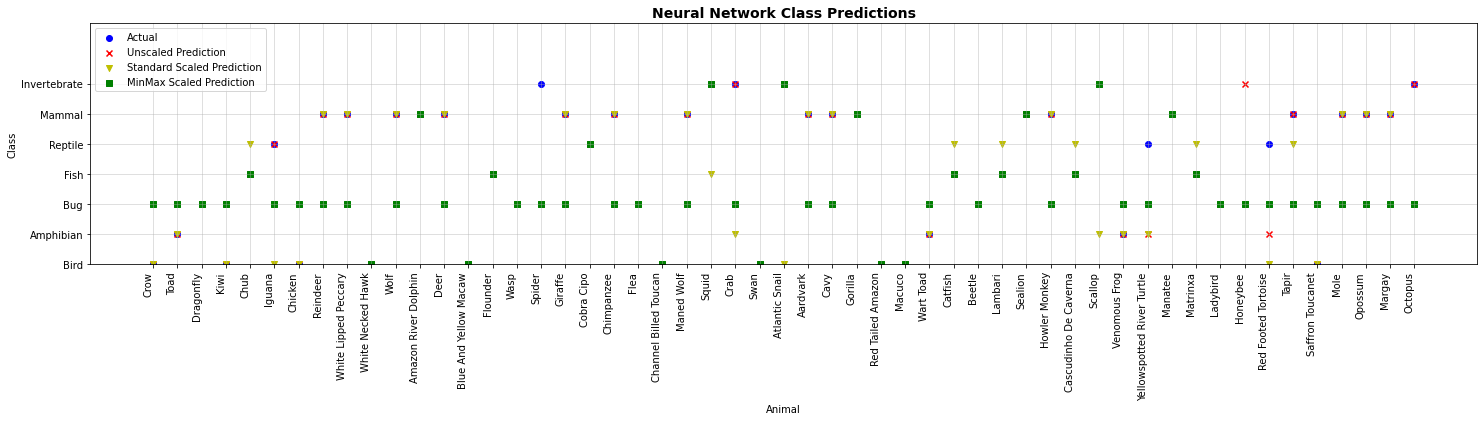

In [20]:
# Create the scatter plot of actual and predictions
# Neural Network
fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(nn_predictions_table.index, nn_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(nn_predictions_table.index, nn_predictions_table.Unscaled_Prediction, marker='x', color='r', label='Unscaled Prediction')
plt.scatter(nn_predictions_table.index, nn_predictions_table.Standard_Scaled_Prediction, marker='v', color='y', label='Standard Scaled Prediction')
plt.scatter(nn_predictions_table.index, nn_predictions_table.MinMax_Scaled_Prediction, marker='s', color='g', label='MinMax Scaled Prediction')

plt.title('Neural Network Class Predictions',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

plt.savefig('../resources/neural_network.png', dpi=fig.dpi)
plt.show()

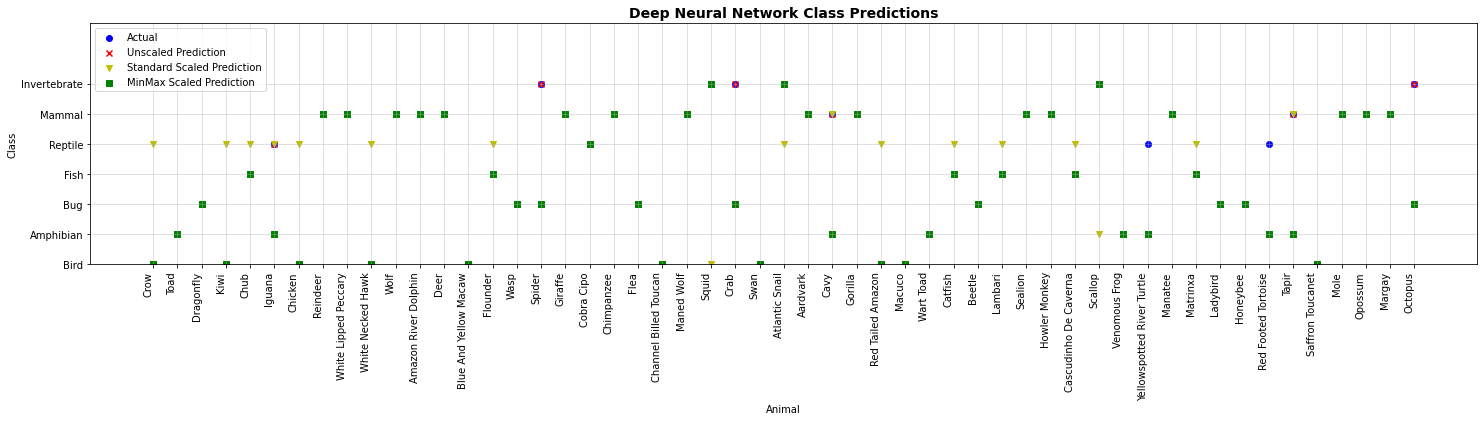

In [21]:
# Create the scatter plot of actual and predictions
# Deep Neural Network
fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(nn_deep_predictions_table.index, nn_deep_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(nn_deep_predictions_table.index, nn_deep_predictions_table.Unscaled_Prediction, marker='x', color='r', label='Unscaled Prediction')
plt.scatter(nn_deep_predictions_table.index, nn_deep_predictions_table.Standard_Scaled_Prediction, marker='v', color='y', label='Standard Scaled Prediction')
plt.scatter(nn_deep_predictions_table.index, nn_deep_predictions_table.MinMax_Scaled_Prediction, marker='s', color='g', label='MinMax Scaled Prediction')

plt.title('Deep Neural Network Class Predictions',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

plt.savefig('../resources/deep_neural_network.png', dpi=fig.dpi)
plt.show()